This is an analysis of the script of the 1994 movie "Pulp Fiction" directed by Quentin Tarantino.

The analysis primarily focuses on the words in the final draft of the script available [here](http://www.godamongdirectors.com/scripts/pulp.shtml).

Prior preprocessing was performed to remove non-essential parts of the data i.e the FADE INS, Actions, transitions etc.

Imports

In [3]:
import pandas as pd
import string
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

Load the data i.e the script

In [4]:
# Load the data
lines = open('pulp fiction', encoding='utf-8', errors='ignore').read()

Data Cleaning and Preprocessing

In [5]:
lines.split('\n')

['                                  YOUNG MAN',
 "                       No, forget it, it's too risky.  I'm",
 "                       through doin' that shit.",
 '',
 '                                  YOUNG WOMAN',
 '                       You always say that, the same thing',
 "                       every time: never again, I'm",
 '                       through, too dangerous.',
 '',
 '                                   YOUNG MAN',
 "                       I know that's what I always say.",
 "                       I'm always right too, but --",
 '',
 '                                  YOUNG WOMAN',
 '                       -- but you forget about it in a day',
 '                       or two --',
 '',
 '                                  YOUNG MAN',
 '                       -- yeah, well, the days of me',
 "                       forgittin' are over, and the days",
 "                       of me rememberin' have just begun.",
 '',
 '                                  YOUNG WOMAN',

In [6]:
data = []

parts = lines.split('\n\n')
for part in parts:
    person, lines = part.split('\n', 1)
    person = person.strip()
    lines = "\n".join(x.strip() for x in lines.split('\n'))
    data.append([person, lines])

import pandas as pd

df = pd.DataFrame(data)
df.columns = ['person', 'lines']

df.head(10)

,person,lines
0,YOUNG MAN,"No, forget it, it's too risky. I'm\nthrough d..."
1,YOUNG WOMAN,"You always say that, the same thing\nevery tim..."
2,YOUNG MAN,I know that's what I always say.\nI'm always r...
3,YOUNG WOMAN,-- but you forget about it in a day\nor two --
4,YOUNG MAN,"-- yeah, well, the days of me\nforgittin' are ..."
5,YOUNG WOMAN,"When you go on like this, you know\nwhat you s..."
6,YOUNG MAN,"I sound like a sensible fucking\nman, is what ..."
7,YOUNG WOMAN,"You sound like a duck.\nQuack, quack, quack, q..."
8,YOUNG MAN,"Well take heart, 'cause you're\nnever gonna ha..."
9,YOUNG WOMAN,After tonight.


In [7]:
df['lines'] = df['lines'].apply(lambda x: re.sub('\n', ' ', x))

In [8]:
df.head()

,person,lines
0,YOUNG MAN,"No, forget it, it's too risky. I'm through do..."
1,YOUNG WOMAN,"You always say that, the same thing every time..."
2,YOUNG MAN,I know that's what I always say. I'm always ri...
3,YOUNG WOMAN,-- but you forget about it in a day or two --
4,YOUNG MAN,"-- yeah, well, the days of me forgittin' are o..."


Begin Line Analysis

In [9]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
lines_bow = vectorizer.fit_transform(df['lines'])

In [10]:
print("Number of lines: ", df.shape[0])
print("Number of unique words: ", lines_bow.shape[1])

Number of lines:  1286
Number of unique words:  3596


Create a new column for the length of each line (in words)

In [11]:
df['line_length'] = df.lines.apply(lambda x: len(set(x.split())))

Check who says the most lines

In [12]:
line_count = df.groupby(['person'])['lines'].count().reset_index().sort_values(by = 'lines', ascending=False).reset_index().drop('index', axis=1)
line_count

,person,lines
0,VINCENT,280
1,JULES,233
2,BUTCH,144
3,FABIAN,92
4,MIA,82
5,THE WOLF,52
6,LANCE,49
7,JIMMIE,36
8,PUMPKIN,34
9,YOUNG MAN,27


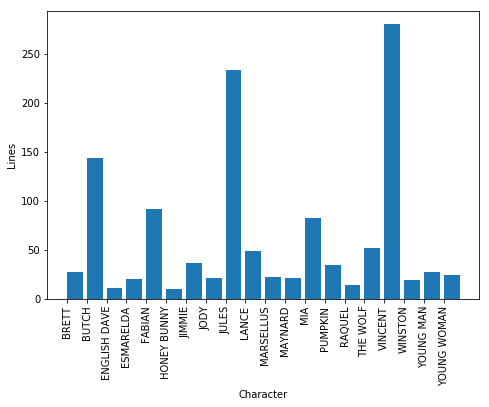

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
person = line_count.person.head(20)
lines = line_count.lines.head(20)
ax.bar(person,lines, align ='edge')
ax.set_ylabel('Lines')
ax.set_xlabel('Character')
plt.xticks(rotation=90)
plt.show()

In [15]:
df.head(20)

,person,lines,line_length
0,YOUNG MAN,"No, forget it, it's too risky. I'm through do...",11
1,YOUNG WOMAN,"You always say that, the same thing every time...",15
2,YOUNG MAN,I know that's what I always say. I'm always ri...,11
3,YOUNG WOMAN,-- but you forget about it in a day or two --,11
4,YOUNG MAN,"-- yeah, well, the days of me forgittin' are o...",15
5,YOUNG WOMAN,"When you go on like this, you know what you so...",10
6,YOUNG MAN,"I sound like a sensible fucking man, is what I...",10
7,YOUNG WOMAN,"You sound like a duck. Quack, quack, quack, qu...",8
8,YOUNG MAN,"Well take heart, 'cause you're never gonna haf...",20
9,YOUNG WOMAN,After tonight.,2


Now let's create a column for a preprocessed version of each line.
We'll lower, stem, remove punctuation from and tokenize each line

In [19]:
stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

def process_lines(x):
    new_line = ''
    lowered = x.lower()
    stemmed = stemmer.stem(lowered)
    depunctuated = stemmed.translate(str.maketrans('', '', string.punctuation))
    #Let's actually not lametize today
    tokens = word_tokenize(depunctuated)
    line_word_list = [i for i in tokens if not i in stop_words]
    #result = ''.join(line_word_list)
    for word in line_word_list:  
        new_line += word + ' '
    return new_line

In [21]:
process_lines(df.lines[0])

'forget risky im doin shit '

In [22]:
df['edited_lines'] = df.lines.apply(lambda x: process_lines(x))

In [23]:
df.head()

,person,lines,line_length,edited_lines
0,YOUNG MAN,"No, forget it, it's too risky. I'm through do...",11,forget risky im doin shit
1,YOUNG WOMAN,"You always say that, the same thing every time...",15,always say thing every time never im dangerous
2,YOUNG MAN,I know that's what I always say. I'm always ri...,11,know thats always say im always right
3,YOUNG WOMAN,-- but you forget about it in a day or two --,11,forget day two
4,YOUNG MAN,"-- yeah, well, the days of me forgittin' are o...",15,yeah well days forgittin days rememberin begun


Vectorize the preproccesed lines 

In [24]:
edited_lines_bow = vectorizer.fit_transform(df['edited_lines'])

In [25]:
print("Number of unique words in original: ", lines_bow.shape[1])
print("Number of unique words in preprocessed lines: ", edited_lines_bow.shape[1])

Number of unique words in original:  3596
Number of unique words in preprocessed lines:  2306


In [26]:
words = vectorizer.get_feature_names()
print("Few words: ", words[:20])

Few words:  ['100', '1030', '1974', '22year', '2517', '357', '45', '7000', '818', '930', 'ability', 'able', 'absolutely', 'abuse', 'abusive', 'accentuate', 'accepted', 'accident', 'accidentally', 'according']


In [27]:
freq = edited_lines_bow.sum(axis=0).A1
word_to_count_map = dict(zip(words, freq))

list = []
for key, value in word_to_count_map.items():
    list.append([key, value])
    
words_df = pd.DataFrame(list, columns=['words', 'Counts']).sort_values(by='Counts', ascending= False).reset_index().drop('index', axis=1)
words_df.head()

,words,Counts
0,im,147
1,dont,146
2,na,121
3,fuckin,98
4,got,93


Let's look at a word cloud because we're fancy like that

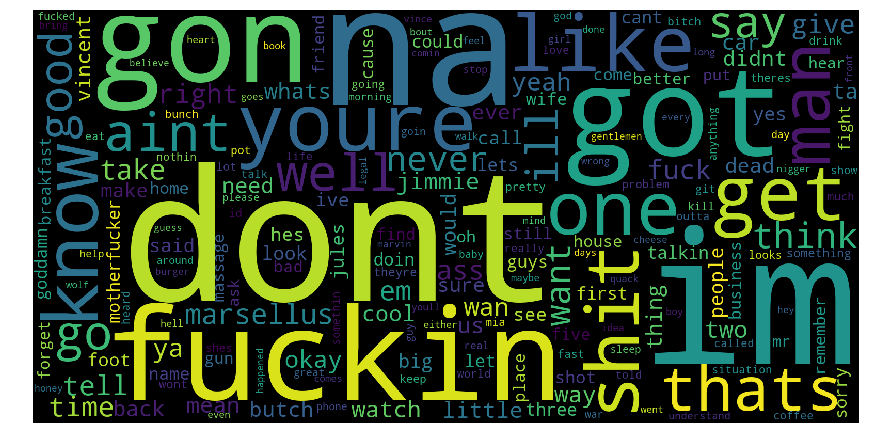

In [28]:
word_cloud_2 = WordCloud(width=1600,height=800,).generate_from_frequencies(word_to_count_map)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud_2)
plt.axis('off')
plt.tight_layout(pad=0)

### Royal with cheese anyone?

What are the entities, products and companies named in the movie?

We'll use SpaCy for POS tags and NER since nltk doesn't so so well in this area

In [39]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

Create a string with all the de-duplicated and preprocessed words in the script

In [46]:
word_string = ''
for word in words:
    word_string += (word + ' ')

In [48]:
len(word_string)

16389

In [49]:
script_words = nlp(word_string)
print('There are ', len(script_words.ents) , 'entities in the script')

There are  183 entities in the script


In [50]:
labels = [x.label_ for x in script_words.ents]
Counter(labels)

Counter({'CARDINAL': 18,
         'DATE': 10,
         'FAC': 2,
         'GPE': 15,
         'LANGUAGE': 1,
         'LOC': 2,
         'NORP': 17,
         'ORDINAL': 1,
         'ORG': 30,
         'PERSON': 79,
         'PRODUCT': 4,
         'TIME': 3,
         'WORK_OF_ART': 1})

## Let's examine the great line(s) from Captain Koons regarding Butch's watch

![title](koons.jpg)

In [78]:
koons_line = df[df.person == "CAPT. KOONS"]['lines'].values[1]
koons_line[:160]

'This watch I got here was first purchased by your great-granddaddy. It was bought during the First World War in a little general store in Knoxville, Tennessee. '

In [71]:
koons_nlp = nlp(koons_line)
print('There are ', len(koons_nlp.ents) , 'entities in koons speech')

There are  27 entities in koons speech


In [81]:
pprint([(X.text, X.label_) for X in koons_nlp.ents])

[('the First World War', 'EVENT'),
 ('Knoxville', 'GPE'),
 ('Tennessee', 'GPE'),
 ('Doughboy Ernie Coolidge', 'PERSON'),
 ('the day', 'DATE'),
 ('Paris', 'GPE'),
 ('first', 'ORDINAL'),
 ('every day', 'DATE'),
 ('Dane Coolidge', 'PERSON'),
 ('Germans', 'NORP'),
 ('World War Two', 'EVENT'),
 ('Dane', 'PERSON'),
 ('Marine', 'ORG'),
 ('Marines', 'NORP'),
 ('Wake Island', 'LOC'),
 ('three days', 'DATE'),
 ('Japanese', 'NORP'),
 ('Air Force', 'ORG'),
 ('Winocki', 'ORG'),
 ('Three days later', 'DATE'),
 ('Winocki', 'ORG'),
 ('Hanoi', 'GPE'),
 ('Vietnamese', 'NORP'),
 ('one', 'CARDINAL'),
 ('Five long years', 'DATE'),
 ('two years', 'DATE'),
 ('seven years', 'DATE')]


In [73]:
sentence = [x for x in koons_nlp.sents]

displacy.render(nlp(str(sentence)), jupyter=True, style='ent')

![title](spacy_reference.png)

In [85]:
displacy.render(nlp(str(sentence[:3])), style='dep', jupyter = True, options = {'distance': 120})

Part of Speech (POS) extraction and lammetization for each word in the line 

In [86]:
[(x.orth_,x.pos_, x.lemma_) for x in [y 
                                      for y
                                      in nlp(str(sentence)) 
                                      if not y.is_stop and y.pos_ != 'PUNCT']]

[('watch', 'NOUN', 'watch'),
 ('got', 'VERB', 'get'),
 ('purchased', 'VERB', 'purchase'),
 ('great', 'ADJ', 'great'),
 ('granddaddy', 'NOUN', 'granddaddy'),
 ('bought', 'VERB', 'buy'),
 ('World', 'PROPN', 'World'),
 ('War', 'PROPN', 'War'),
 ('little', 'ADJ', 'little'),
 ('general', 'ADJ', 'general'),
 ('store', 'NOUN', 'store'),
 ('Knoxville', 'PROPN', 'Knoxville'),
 ('Tennessee', 'PROPN', 'Tennessee'),
 (' ', 'SPACE', ' '),
 ('bought', 'VERB', 'buy'),
 ('private', 'ADJ', 'private'),
 ('Doughboy', 'PROPN', 'Doughboy'),
 ('Ernie', 'PROPN', 'Ernie'),
 ('Coolidge', 'PROPN', 'Coolidge'),
 ('day', 'NOUN', 'day'),
 ('set', 'VERB', 'set'),
 ('sail', 'NOUN', 'sail'),
 ('Paris', 'PROPN', 'Paris'),
 (' ', 'SPACE', ' '),
 ('great-', 'NOUN', 'great-'),
 ('granddaddy', 'PROPN', 'granddaddy'),
 ('war', 'NOUN', 'war'),
 ('watch', 'NOUN', 'watch'),
 ('company', 'NOUN', 'company'),
 ('wrist', 'NOUN', 'wrist'),
 ('watches', 'NOUN', 'watch'),
 (' ', 'SPACE', ' '),
 ('people', 'NOUN', 'people'),
 ('carri

In [87]:
 Counter([x.label_ for x in koons_nlp.ents])

Counter({'CARDINAL': 1,
         'DATE': 7,
         'EVENT': 2,
         'GPE': 4,
         'LOC': 1,
         'NORP': 4,
         'ORDINAL': 1,
         'ORG': 4,
         'PERSON': 3})